# Problem Statement :. 2

In [1]:
# Consider only the below columns and prepare a prediction model for predicting Price.

# Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

# Model -- model of the car
# Price  -- Offer Price in EUROs	
# Age_08_04 -- Age in months as in August 2004	
# Mfg_Month -- Manufacturing month (1-12)	
# Mfg_Year	-- Manufacturing Year
# KM -- Accumulated Kilometers on odometer
# Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
# HP -- Horse Power
# Met_Color	 -- Metallic Color?  (Yes=1, No=0)
# Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
# Automatic	-- Automatic ( (Yes=1, No=0)
# cc -- Cylinder Volume in cubic centimeters
# Doors -- Number of doors
# Cylinders	-- Number of cylinders
# Gears -- Number of gear positions
# Quarterly_Tax -- Quarterly road tax in EUROs
# Weight -- Weight in Kilograms
# Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
# BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
# Guarantee_Period -- 	Guarantee period in months
# ABS -- Anti-Lock Brake System (Yes=1, No=0)
# Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
# Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
# Airco -- Airconditioning  (Yes=1, No=0)
# Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
# Boardcomputer -- Boardcomputer  (Yes=1, No=0)
# CD_Player -- CD Player  (Yes=1, No=0)
# Central_Lock -- Central Lock  (Yes=1, No=0)
# Powered_Windows -- Powered Windows  (Yes=1, No=0)
# Power_Steering -- Power Steering  (Yes=1, No=0)
# Radio -- Radio  (Yes=1, No=0)
# Mistlamps	-- Mistlamps  (Yes=1, No=0)
# Sport_Model -- Sport Model  (Yes=1, No=0)
# Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
# Metallic_Rim --Metallic Rim  (Yes=1, No=0)
# Radio_cassette -- Radio Cassette  (Yes=1, No=0)
# Tow_Bar -- Tow Bar  (Yes=1, No=0)




In [2]:
import warnings
warnings.filterwarnings('ignore')

### import Libraries

In [3]:
import pandas as pd 
import numpy as np
from sklearn import linear_model #machine learning
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("ToyotaCorolla.csv",encoding="ISO-8859-1")

In [5]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [6]:
df=df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [7]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# EDA And Data Visualization

In [8]:
# rename the column name
df.rename({"Age_08_04":"Age","Quarterly_Tax":"Tax","Weight":"Wt"},axis=1,inplace=True)

In [9]:
df.columns.values

array(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Tax', 'Wt'],
      dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   Tax     1436 non-null   int64
 8   Wt      1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [11]:
#statistics description
df.describe()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Wt
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [12]:
df.shape

(1436, 9)

In [13]:
# to print the duplicated row
df[df.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Wt
113,24950,8,13253,116,2000,5,5,234,1320


In [14]:
#drop the duplicate row
df=df.drop([113],axis=0)

In [15]:
df


,Price,Age,KM,HP,cc,Doors,Gears,Tax,Wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [16]:
# number of the rows and columns
df.shape

(1435, 9)

In [17]:
#correlation analysis
df.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Wt
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Wt,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


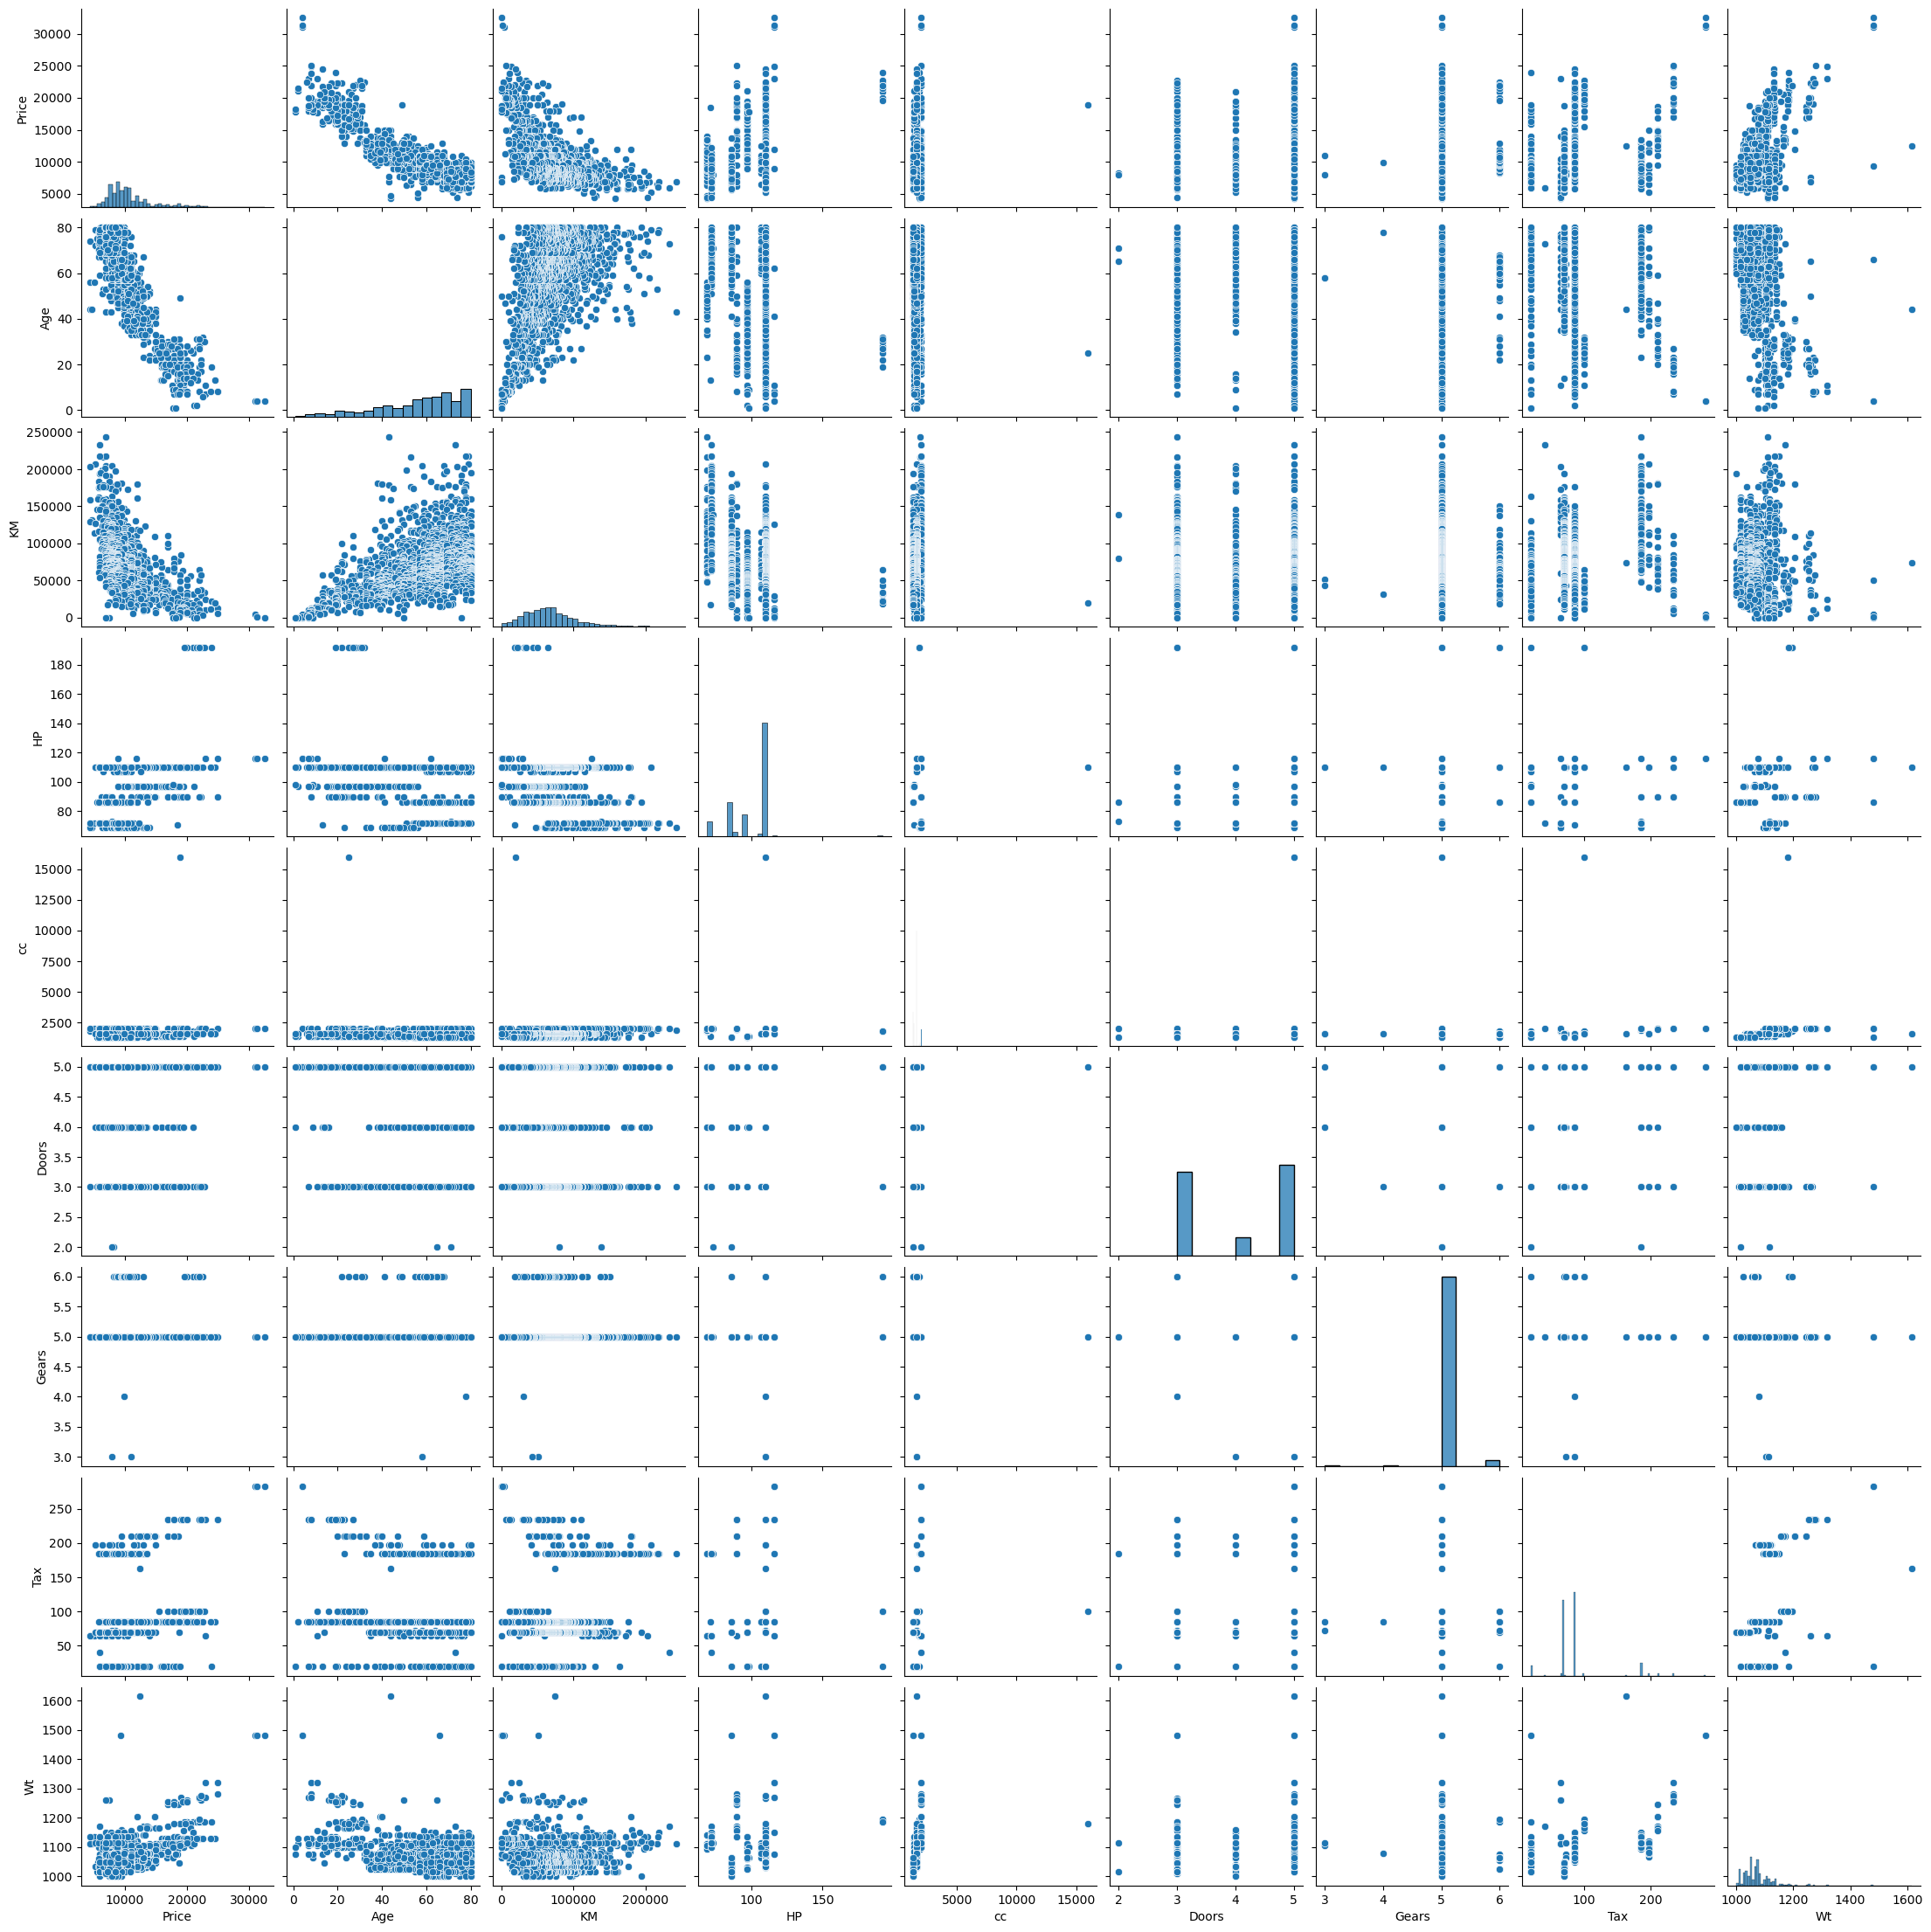

In [18]:
sns.pairplot(df)
plt.show()

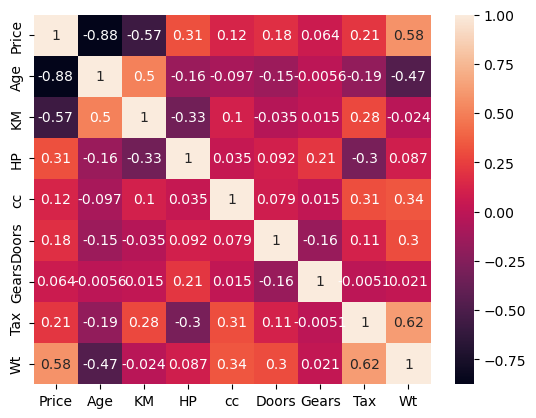

In [19]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# Prepare a model

In [20]:
y=df["Price"]
y.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [21]:
x=df[["Age","KM","HP","cc","Doors","Gears","Tax","Wt"]]
x.head()      

,Age,KM,HP,cc,Doors,Gears,Tax,Wt
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170


In [22]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('y~x',data=df).fit()

In [23]:
#coefficient
model.params

Intercept   -5472.540368
x[0]         -121.713891
x[1]           -0.020737
x[2]           31.584612
x[3]           -0.118558
x[4]           -0.920189
x[5]          597.715894
x[6]            3.858805
x[7]           16.855470
dtype: float64

In [24]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    -3.875273
x[0]        -46.551876
x[1]        -16.552424
x[2]         11.209719
x[3]         -1.316436
x[4]         -0.023012
x[5]          3.034563
x[6]          2.944198
x[7]         15.760663
dtype: float64 
 Intercept     1.113392e-04
x[0]         1.879217e-288
x[1]          1.994713e-56
x[2]          5.211155e-28
x[3]          1.882393e-01
x[4]          9.816443e-01
x[5]          2.452430e-03
x[6]          3.290363e-03
x[7]          1.031118e-51
dtype: float64


In [25]:
##  p<0.5 therefore All independent variables are significant

In [26]:
#R squared values MLR
(model.rsquared,model.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

In [27]:
#R squared values MLR
(model.rsquared,model.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

# VIF

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# the independent variables set
X = df[['Age','KM','HP','cc','Doors','Gears','Tax','Wt']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
						for i in range(len(X.columns))]

print(vif_data)


  feature         VIF
0     Age   16.392665
1      KM    7.601207
2      HP   64.894446
3      cc   17.186097
4   Doors   21.856114
5   Gears  439.672599
6     Tax   11.021647
7      Wt  543.522036


# AIC

In [29]:
model.aic

24750.407207346932

## Test for Normality of Residuals (Q-Q Plot)

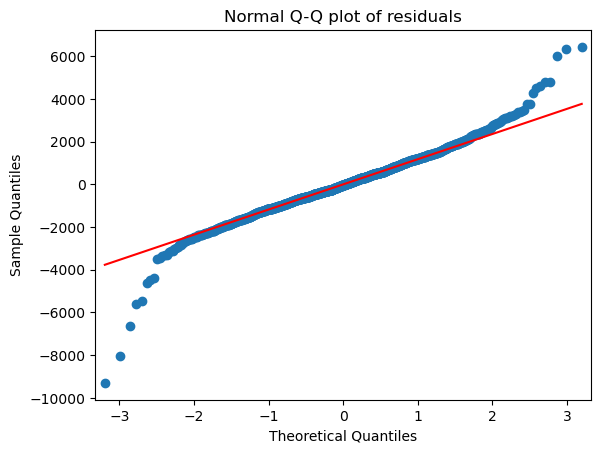

In [30]:
import statsmodels.api as sm

#model = smf.ols('MPG~VOL+SP+HP',data=cars).fit()
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [31]:
list(np.where(model.resid>(-4500)))

[array([   0,    1,    2, ..., 1432, 1433, 1434], dtype=int64)]

In [32]:
list(np.where(model.resid>(5000)))

[array([109, 146, 522], dtype=int64)]

# cooks distance to detect outliers

In [36]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

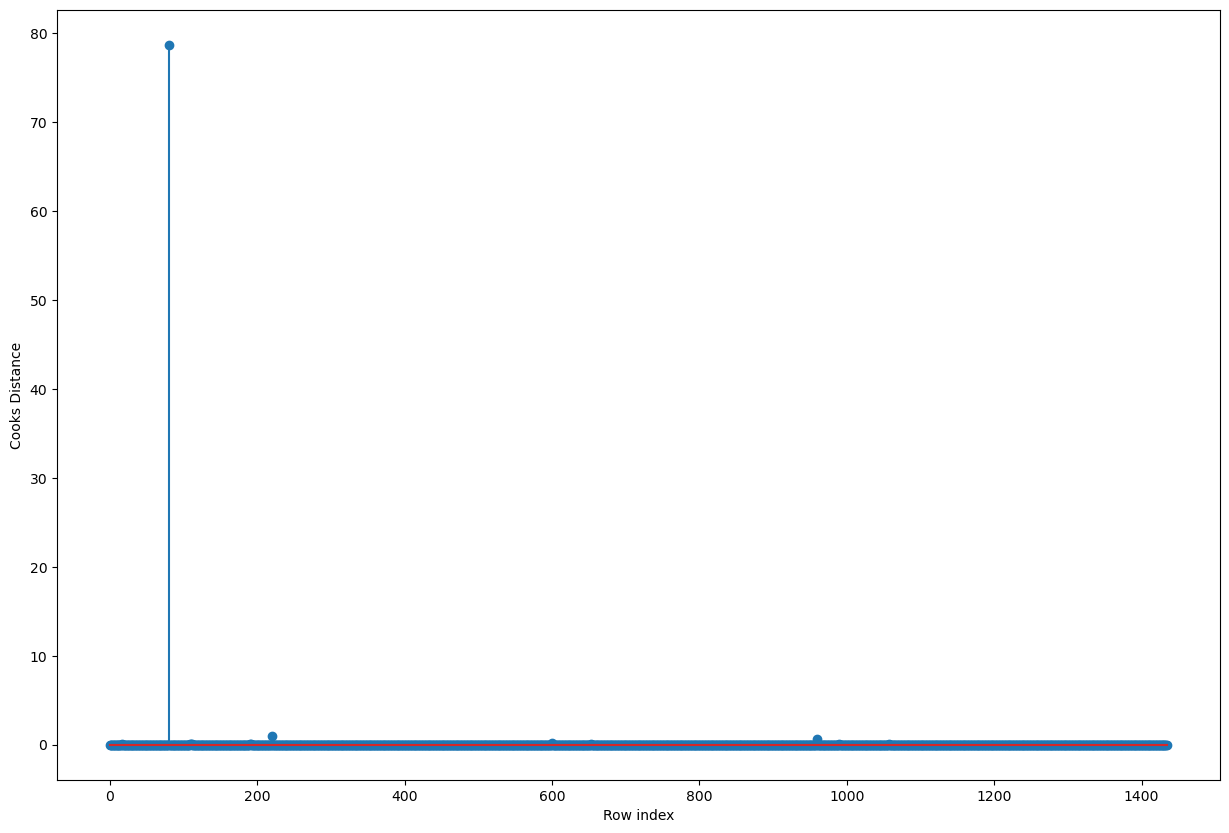

In [37]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(15,10))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [38]:
#The Cook's distance is considered high if it is greater than 0.5 and extreme if it is greater than 1
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c)) # 80 is index number and 78.72 is cook's distance

(80, 78.7295058224916)

In [39]:
k = df.shape[1] # k is no of variables
n = df.shape[0] # n is no of data points
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

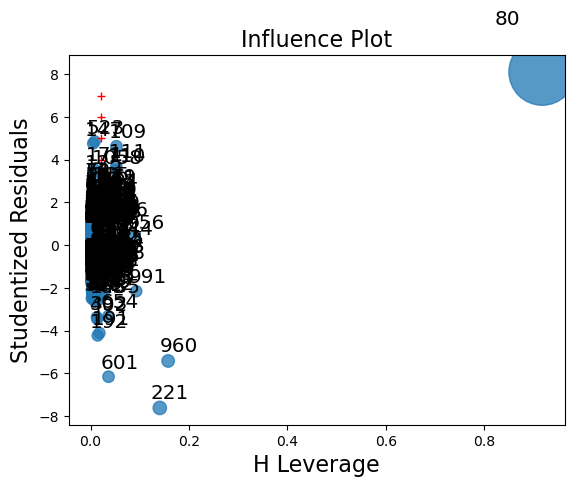

In [40]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alpha=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [41]:

df[df.index.isin([80,221,960])]

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Wt
80,18950,25,20019,110,16000,5,5,100,1180
221,12450,44,74172,110,1600,5,5,163,1615
960,9390,66,50806,86,1300,3,5,19,1480


In [42]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df1=df.drop(df.index[[80,221,960]],axis=0).reset_index()

In [43]:
df1

,index,Price,Age,KM,HP,cc,Doors,Gears,Tax,Wt
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1427,1431,7500,69,20544,86,1300,3,5,69,1025
1428,1432,10845,72,19000,86,1300,3,5,69,1015
1429,1433,8500,71,17016,86,1300,3,5,69,1015
1430,1434,7250,70,16916,86,1300,3,5,69,1015


### again check for influencer

In [44]:

model2= smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Wt',data = df1).fit()

In [45]:
(model2.rsquared,model2.aic) 

(0.8683509351531515, 24634.017631568684)

In [46]:

model2_influence = model2.get_influence()
(c, _) = model2_influence.cooks_distance


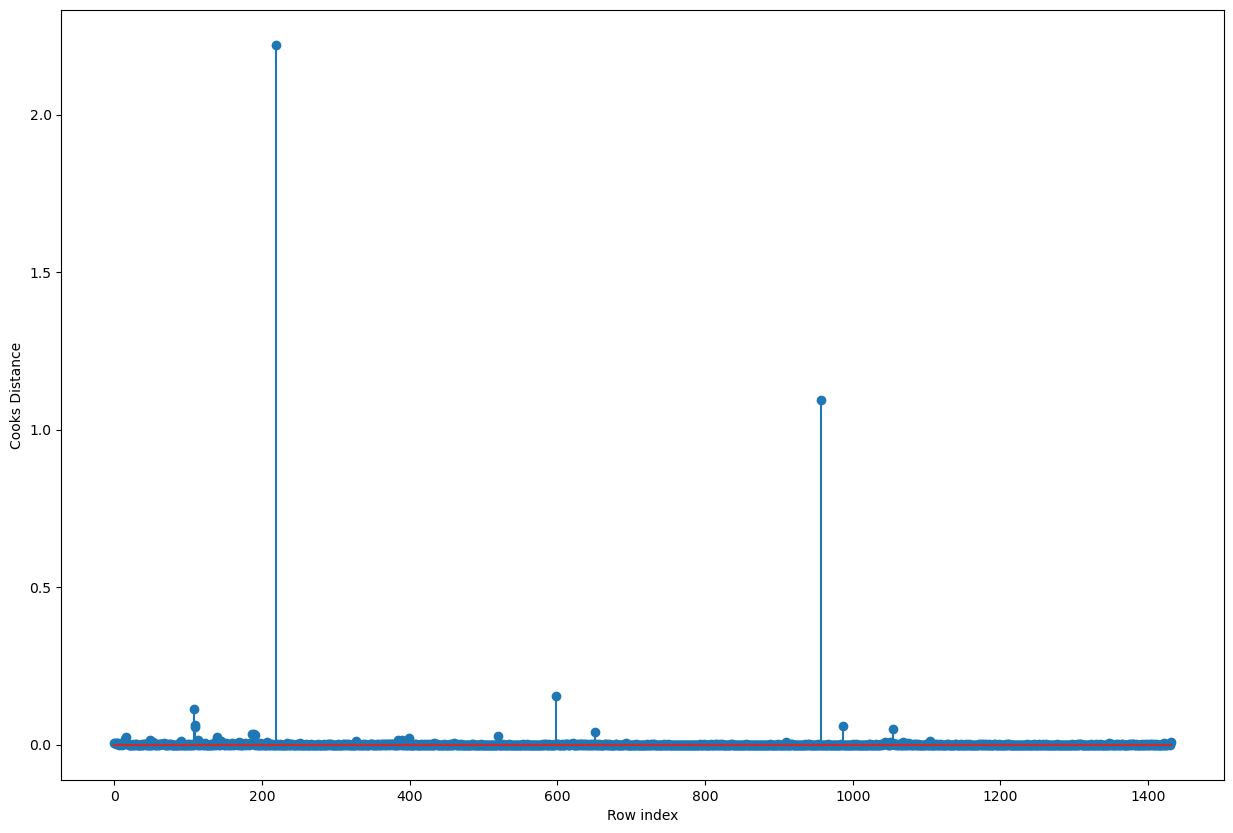

In [47]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(15,10))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [48]:
#The Cook's distance is considered high if it is greater than 0.5 and extreme if it is greater than 1
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c)) # 219 is index number and 2.22 is cook's distance

(219, 2.222347656677075)

In [49]:
k = df1.shape[1] # k is no of variables
n = df1.shape[0] # n is no of data points
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.023044692737430168

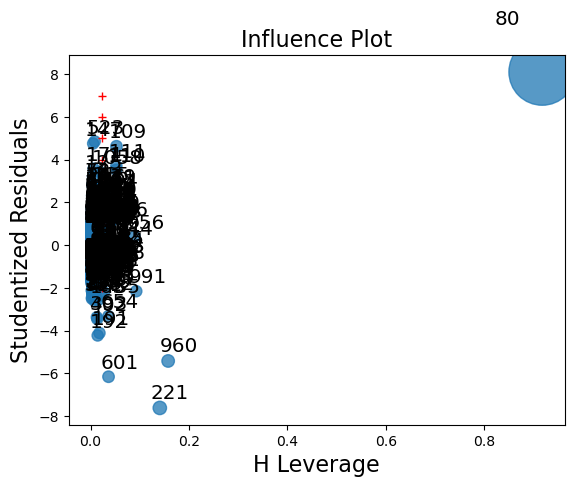

In [50]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alpha=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [51]:

df1[df1.index.isin([219])]

,index,Price,Age,KM,HP,cc,Doors,Gears,Tax,Wt
219,221,12450,44,74172,110,1600,5,5,163,1615


In [52]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df2=df1.drop(df1.index[[219]],axis=0).reset_index()

In [53]:

model2= smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Wt',data = df2).fit()

In [54]:
(model2.rsquared,model2.aic) 

(0.8768090729428318, 24522.571092447783)

In [55]:

model2= smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Wt',data = df2).fit()

### again check for influencer

In [56]:

model2_influence = model2.get_influence()
(c, _) = model2_influence.cooks_distance


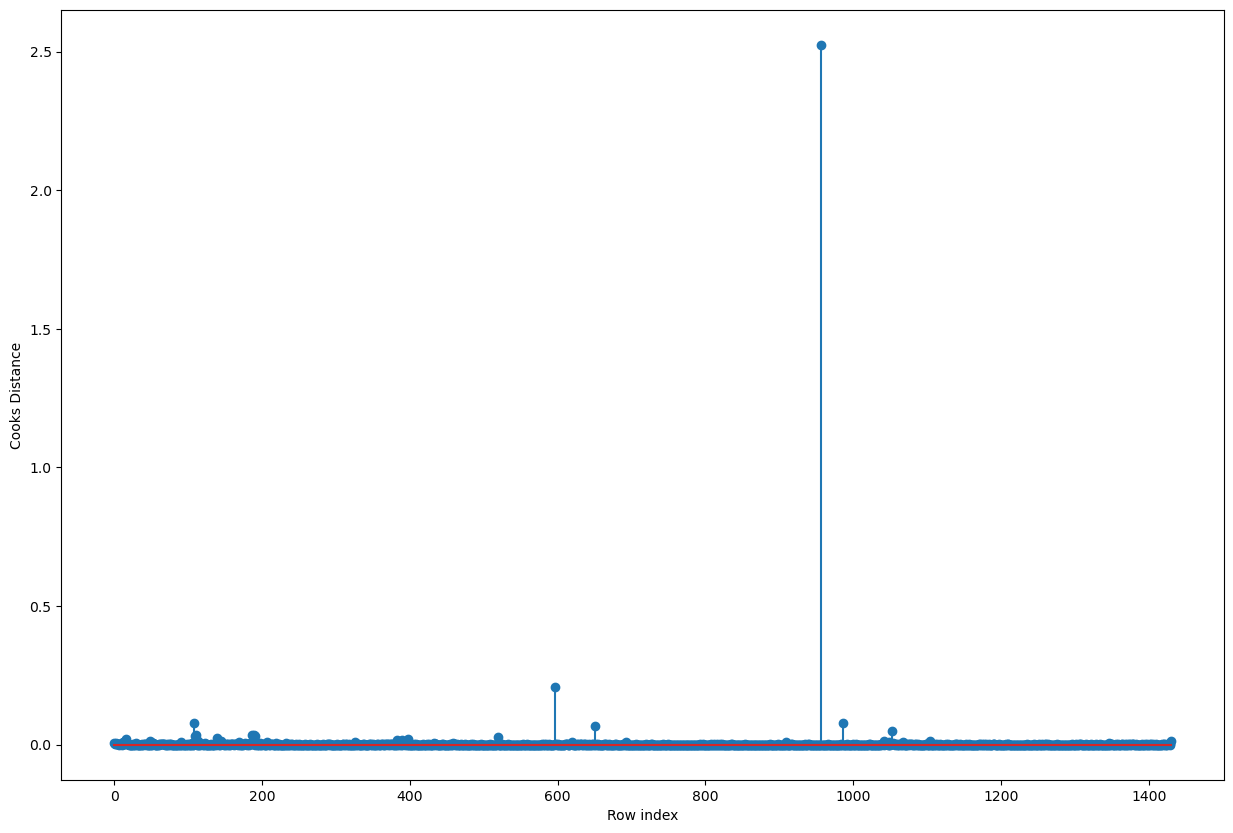

In [57]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(15,10))
plt.stem(np.arange(len(df2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [58]:
#The Cook's distance is considered high if it is greater than 0.5 and extreme if it is greater than 1
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c)) # 219 is index number and 2.22 is cook's distance

(956, 2.524911572374281)

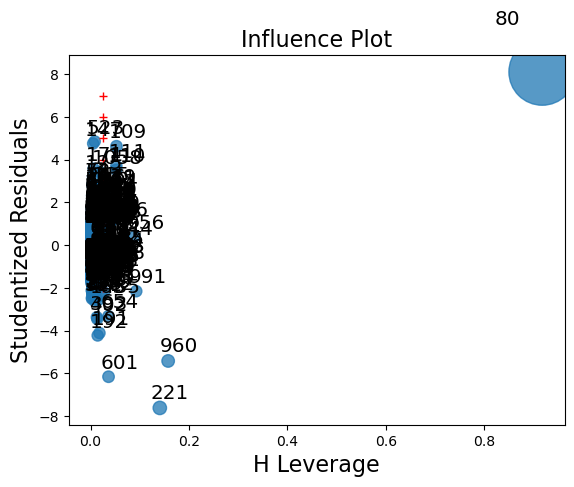

In [59]:
k = df2.shape[1] # k is no of variables
n = df2.shape[0] # n is no of data points
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alpha=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [60]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df3=df2.drop(df2.index[80],axis=0)

### again check for influencer

In [61]:
model2= smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Wt',data = df3).fit()

In [62]:

model2_influence = model2.get_influence()
(c, _) = model2_influence.cooks_distance


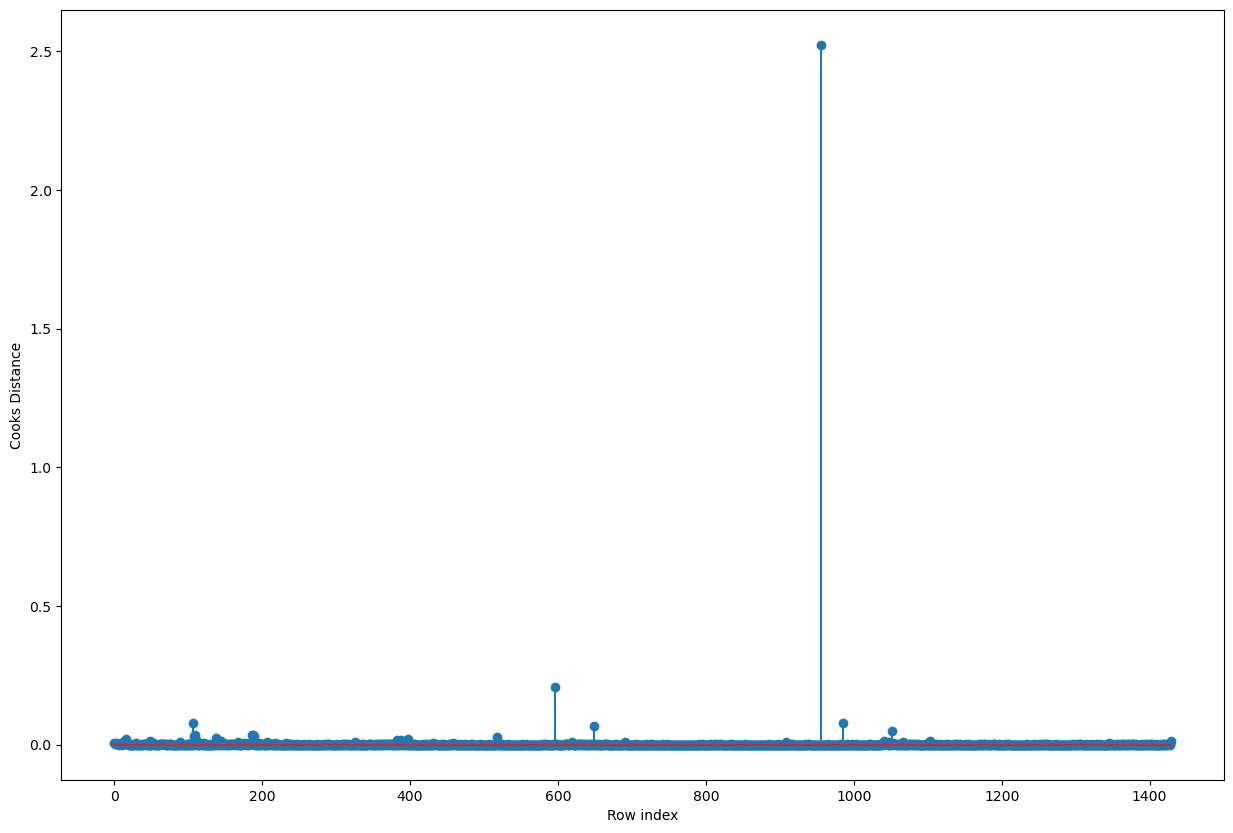

In [63]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(15,10))
plt.stem(np.arange(len(df3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [64]:
#The Cook's distance is considered high if it is greater than 0.5 and extreme if it is greater than 1
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c)) # 956 is index number and 2.52 is cook's distance

(955, 2.524049600920342)

In [65]:


df1[df1.index.isin([219])]

,index,Price,Age,KM,HP,cc,Doors,Gears,Tax,Wt
219,221,12450,44,74172,110,1600,5,5,163,1615


In [66]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df4=df3.drop(df3.index[80],axis=0)

In [68]:
model2= smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Wt',data = df4).fit()

In [70]:
(model2.rsquared,model2.aic) 

(0.8765240015445611, 24488.604075094954)

### Since the value is <0.5 , we can stop the diagnostic process and finalize the model

In [71]:
#model without gears
model3= smf.ols('Price~Age+KM+HP+cc+Doors+Tax+Wt',data = df4).fit()

In [72]:
(model3.rsquared,model3.aic) 

(0.8759302322529721, 24493.459356507752)

In [73]:
# model without Doors
model4= smf.ols('Price~Age+KM+HP+cc+Gears+Tax+Wt',data = df4).fit()

In [74]:
(model4.rsquared,model4.aic) 

(0.8762906564371045, 24489.30205269253)

In [75]:
# model without gears and doors
model5= smf.ols('Price~Age+KM+HP+cc+Tax+Wt',data = df4).fit()

In [76]:
(model5.rsquared,model5.aic) 

(0.8755147592478598, 24496.236660983344)

In [77]:
df.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Wt
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Wt,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


In [78]:
#model 6 without cc
model6= smf.ols('Price~Age+KM+HP+Doors+Gears+Tax+Wt',data = df4).fit()

In [79]:
(model6.rsquared,model6.aic) 

(0.8670085681249365, 24592.69005057736)

In [80]:
#model 7 without cc,gears,doors
model7= smf.ols('Price~Age+KM+HP+Tax+Wt',data = df4).fit()

In [81]:
(model7.rsquared,model7.aic) 

(0.8660214116531006, 24599.25792652194)

In [82]:
#model 8 without tax
model8= smf.ols('Price~Age+KM+HP+Doors+Gears+cc+Wt',data = df4).fit()

In [83]:
(model8.rsquared,model8.aic) 

(0.8736716115312404, 24519.239550729497)

In [84]:
#model9 without cc,gears,doors,tax
model9= smf.ols('Price~Age+KM+HP+Wt',data = df4).fit()

In [85]:
(model9.rsquared,model9.aic) 

(0.8657673420001297, 24599.965237625685)

In [86]:
#model10 without cc,gears,doors,tax
model10= smf.ols('Price~Age+KM+HP+Wt',data = df4).fit()
(model10.rsquared,model10.aic) 

(0.8657673420001297, 24599.965237625685)

In [87]:

#model 11 without gears and tax
model11= smf.ols('Price~KM+Age+HP+Doors+Wt+cc',data = df4).fit()

In [88]:
(model11.rsquared,model11.aic)

(0.8729153056932808, 24525.76921493976)

In [89]:

d5={
    'Prep_Models':['Model','Model2','Model3','Model4','Model5','Model6','Model7','Model8','Model9','Model10','Model11'],
   'Rsquared': [model.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared,model6.rsquared,model7.rsquared,model8.rsquared,model9.rsquared,model10.rsquared,model11.rsquared],
    'AIC':[model.aic,model2.aic,model3.aic,model4.aic,model5.aic,model6.aic,model7.aic,model8.aic,model9.aic,model10.aic,model11.aic]
   }
table=pd.DataFrame(d5)
table.index = np.arange(1, len(table) + 1)

table


,Prep_Models,Rsquared,AIC
1,Model,0.862520,24750.407207
2,Model2,0.876524,24488.604075
3,Model3,0.875930,24493.459357
4,Model4,0.876291,24489.302053
5,Model5,0.875515,24496.236661
6,Model6,0.867009,24592.690051
7,Model7,0.866021,24599.257927
8,Model8,0.873672,24519.239551
9,Model9,0.865767,24599.965238
10,Model10,0.865767,24599.965238


# conclusion

### model3,4,5,8,11 are good model 

## model10 without cc,gears,doors,tax is perform good

In [90]:
# to see the predicted values of the model
model10.fittedvalues

0       16648.822757
1       16122.781327
2       16636.358032
3       16270.092540
4       16086.912220
            ...     
1426     8722.229764
1427     8191.717389
1428     8351.326144
1429     8472.745155
1430    10833.315303
Length: 1429, dtype: float64

In [91]:
# error
model10.resid

0      -3148.822757
1      -2372.781327
2      -2686.358032
3      -1320.092540
4      -2336.912220
           ...     
1426   -1222.229764
1427    2653.282611
1428     148.673856
1429   -1222.745155
1430   -3883.315303
Length: 1429, dtype: float64